In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import scanpy as sc

In [3]:
df = pd.read_csv("l1000_cell_drug_pair_statics.csv", index_col=0)
df

,cell_drug,num_idose,num_itime,num_item
0,1HAE_BRD-A01317026,1,1,1
1,1HAE_BRD-A04308630,1,1,1
2,1HAE_BRD-A07440155,1,1,1
3,1HAE_BRD-A07780951,1,1,1
4,1HAE_BRD-A09056319,1,1,1
...,...,...,...,...
146974,ZR751_BRD-K92723993,3,1,3
146975,ZR751_BRD-K93918653,3,1,3
146976,ZR751_BRD-K95309561,3,1,3
146977,ZR751_BRD-K99023089,3,1,3


In [4]:
df_filter = df[(df.num_idose >1) & (df.num_itime>1)]
df_filter

,cell_drug,num_idose,num_itime,num_item
1770,A375_BRD-A00546892,4,2,5
1772,A375_BRD-A00758722,3,2,4
1773,A375_BRD-A00827783,4,2,8
1779,A375_BRD-A01320529,3,2,4
1781,A375_BRD-A01593789,3,2,4
...,...,...,...,...
139666,VCAP_BRD-K99785919,2,2,3
139725,VCAP_BRD-M36167927,2,2,3
139768,VCAP_BRD-M77861050,2,2,3
139775,VCAP_BRD-M88044810,2,2,3


# Pie chart

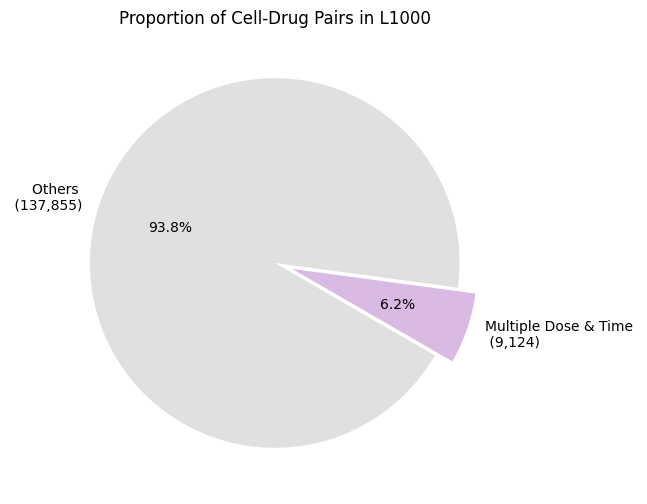

In [5]:
num_total_pairs = 146979
num_multiple_dose_time = 9124
num_other_pairs = num_total_pairs - num_multiple_dose_time #

labels = ['Multiple Dose & Time \n (9,124)', 'Others \n (137,855)']
sizes = [num_multiple_dose_time, num_other_pairs]
colors = ['#D8BAE3','#E0E0E0']  
explode = (0.1, 0)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        colors=colors,
        explode=explode, startangle=330)
plt.title('Proportion of Cell-Drug Pairs in L1000')

# plt.savefig("l1000_pie_chart.svg", format="svg", dpi=300, bbox_inches='tight')

plt.show()

# bubble chart

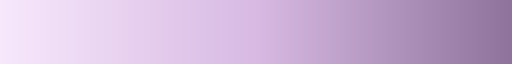

In [6]:
import matplotlib.colors as mcolors

cmap_colors = ['#F7E8FC', '#D8BAE3', '#8F739C'] 
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, N=256)
cmap

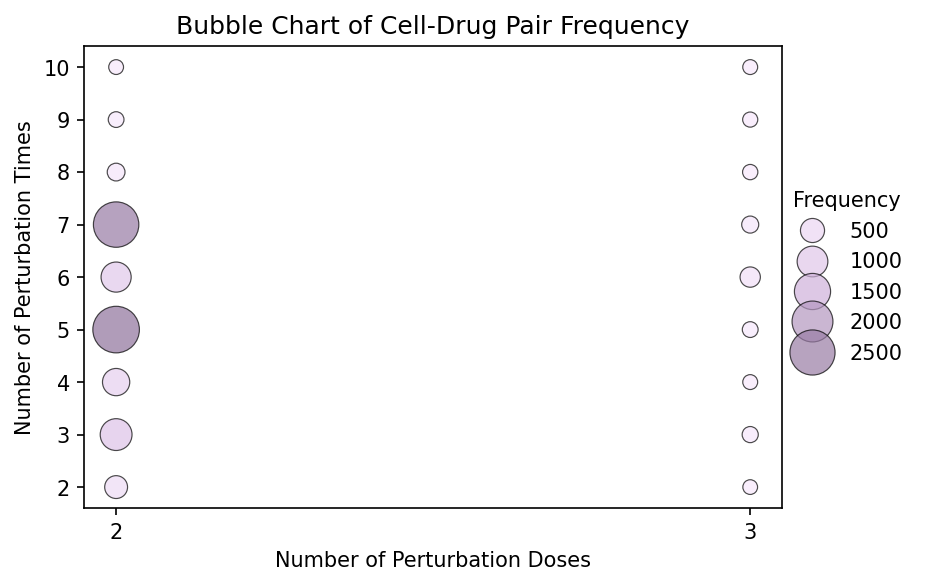

In [7]:
bubble_data = df_filter.groupby(["num_itime", "num_idose"]).size().reset_index(name="count")

plt.figure(figsize=(6,4), dpi=150)
sns.scatterplot(
    data=bubble_data, 
    x="num_itime", 
    y="num_idose", 
    size="count", 
    hue="count", 
    sizes=(50, 500), 
    # palette="coolwarm",
    palette=cmap,
    edgecolor="black",
    alpha=0.7
)

plt.xticks([2,3])
plt.yticks(range(2,11))

plt.xlabel("Number of Perturbation Doses")
plt.ylabel("Number of Perturbation Times")
plt.title("Bubble Chart of Cell-Drug Pair Frequency")
plt.legend(title="Frequency", loc="center right", bbox_to_anchor=(1.2, 0.5), frameon=False)

# plt.savefig("l1000_bubble_chart.svg", format="svg", dpi=300, bbox_inches='tight')


plt.show()

In [11]:
output_df = df.groupby(["num_itime", "num_idose"]).size().reset_index(name="count")
output_df

,num_itime,num_idose,count
0,1,1,61519
1,1,2,3941
2,1,3,25892
3,1,4,3877
4,1,5,6564
5,1,6,1863
6,1,7,6587
7,1,8,23
8,1,9,12
9,2,1,27577


In [12]:
# output_df.to_csv("output.csv")